In [450]:
import xlrd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import math
import re
from sklearn.utils import shuffle
from sklearn import preprocessing

In [451]:
train=pd.read_csv('C:\\Datasets\\Uswe\\DATA.csv',nrows=10000)
test=pd.read_csv('C:\\Datasets\\Uswe\\DATA.csv',skiprows=10000,nrows=500)
#test=pd.read_csv('C:\\Datasets\\Titanic\\test.csv')

In [452]:
train.describe(include='all')

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000.000000
unique,10000,6,5,9952,9932,2,4,NaN,NaN,4,4,4,NaN
top,W-6820,Rain,Light,2016-08-13 07:55:00,2018-08-16 21:35:00,US/Central,KAXS,NaN,NaN,Altus,Jackson,OK,NaN
freq,1,5660,6360,2,3,8028,3697,NaN,NaN,3697,3697,3697,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.098951,-97.904800,NaN,NaN,NaN,68746.768200
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.480308,5.034512,NaN,NaN,NaN,9752.179014
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.537800,-106.168900,NaN,NaN,NaN,56007.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.698600,-99.338100,NaN,NaN,NaN,56007.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.097200,-99.338100,NaN,NaN,NaN,73521.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.682200,-93.372200,NaN,NaN,NaN,73521.000000


In [453]:
test.columns = ['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)','TimeZone','AirportCode','LocationLat','LocationLng','City','County','State','ZipCode']
train.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149


In [454]:
def TimeTaken(data,size):
    tt=[]
    x=data['StartTime(UTC)']
    y=data['EndTime(UTC)']
    for i in range(0,size):
        a=re.split("[- :]",x[i])
        b=re.split("[- :]",y[i])
        for j in range(0,len(a)):
            a[j]=int(a[j])
            b[j]=int(b[j])
        b[0]=(b[0]-a[0])*24*365    
        b[1]=(b[1]-a[1])*24*30    
        b[2]=(b[2]-a[2])*24
        b[3]=(b[3]-a[3])
        b[4]=(b[4]-a[4])/60
        sum=b[0]+b[1]+b[2]+b[3]+b[4]
        tt.append(sum)
    return tt    

In [455]:
trainTT=np.array(TimeTaken(train,10000))
train['tt']=trainTT
testTT=np.array(TimeTaken(test,500))
test['tt']=testTT

In [456]:
#removing start and end time as total time taken is calculated.

In [457]:
train = train.drop(['StartTime(UTC)'], axis = 1)
train = train.drop(['EndTime(UTC)'], axis = 1)
test = test.drop(['StartTime(UTC)'], axis = 1)
test = test.drop(['EndTime(UTC)'], axis = 1)

In [458]:
severity_mapping={'Light':0,'Severe':1,'Moderate Severity':2,'Heavy':3,'UNK':4}
train['Severity']=train['Severity'].map(severity_mapping)
test['Severity']=test['Severity'].map(severity_mapping)

In [459]:
type_mapping={'Snow':0,'Fog':1,'Cold':2,'Storm':3,'Rain':4,'Precipitaion':5}
train['Type']=train['Type'].map(type_mapping)
test['Type']=test['Type'].map(type_mapping)

<AxesSubplot:xlabel='State', ylabel='tt'>

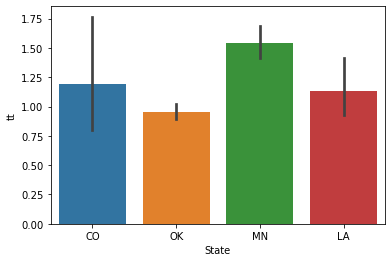

In [460]:
sns.barplot(x='State',y='tt',data=train)

<AxesSubplot:xlabel='City', ylabel='tt'>

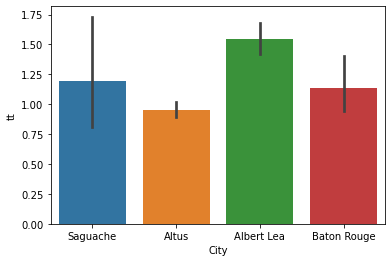

In [461]:
sns.barplot(x='City',y='tt',data=train)

<AxesSubplot:xlabel='County', ylabel='tt'>

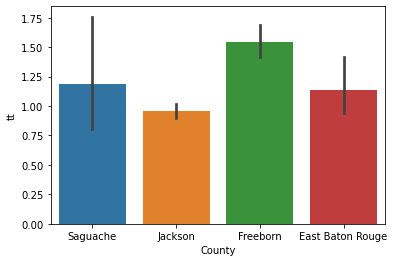

In [462]:
sns.barplot(x='County',y='tt',data=train)

In [463]:
#only one of state,county,city should be kept, as all of them have the exact same distribution.

In [464]:
train = train.drop(['County'], axis = 1)
train = train.drop(['City'], axis = 1)
test = test.drop(['County'], axis = 1)
test = test.drop(['City'], axis = 1)

<AxesSubplot:xlabel='AirportCode', ylabel='tt'>

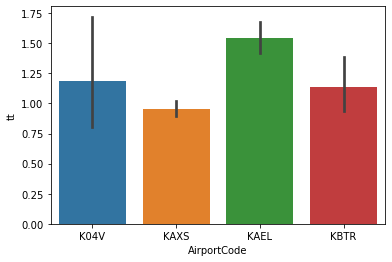

In [465]:
sns.barplot(x='AirportCode',y='tt',data=train)

<AxesSubplot:xlabel='LocationLat', ylabel='tt'>

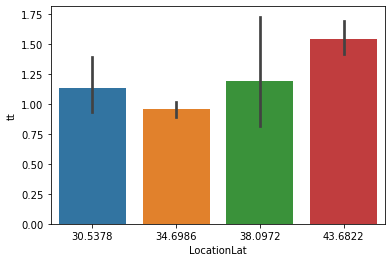

In [466]:
sns.barplot(x='LocationLat',y='tt',data=train)

<AxesSubplot:xlabel='LocationLng', ylabel='tt'>

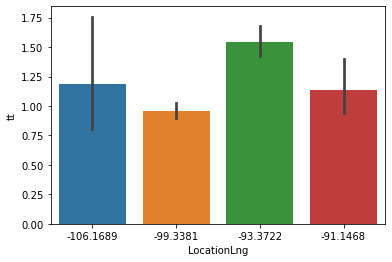

In [467]:
sns.barplot(x='LocationLng',y='tt',data=train)

<AxesSubplot:xlabel='ZipCode', ylabel='tt'>

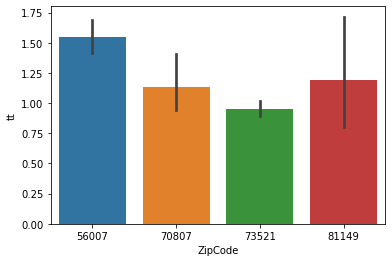

In [468]:
sns.barplot(x='ZipCode',y='tt',data=train)

In [469]:
#locationlng, locationlat ,airportcode, zipcode have the exact same distribution as state.all of them are dropped.

In [470]:
train=train.drop(['AirportCode'],axis=1)
train=train.drop(['ZipCode'],axis=1)
train=train.drop(['LocationLat'],axis=1)
train=train.drop(['LocationLng'],axis=1)
test=test.drop(['AirportCode'],axis=1)
test=test.drop(['ZipCode'],axis=1)
test=test.drop(['LocationLat'],axis=1)
test=test.drop(['LocationLng'],axis=1)

<AxesSubplot:xlabel='TimeZone', ylabel='tt'>

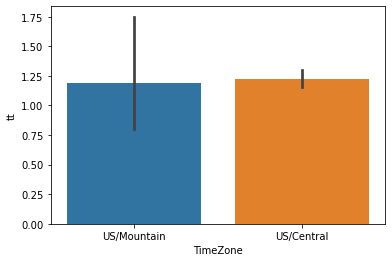

In [471]:
sns.barplot(x='TimeZone',y='tt',data=train)

In [472]:
#timezones appear to have no effect in time taken, hence they are removed

In [473]:
train=train.drop(['TimeZone'],axis=1)
test=test.drop(['TimeZone'],axis=1)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type'>

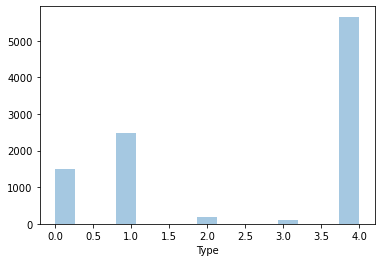

In [474]:
sns.distplot(train['Type'],kde=False)

In [475]:
#As more than of the Type of weather is 4, i.e., rain , we will fill in the missing values in rain i.e., 4

In [476]:
train=train.fillna({"Type":4})
test=test.fillna({"Type":4})

<AxesSubplot:xlabel='Severity'>

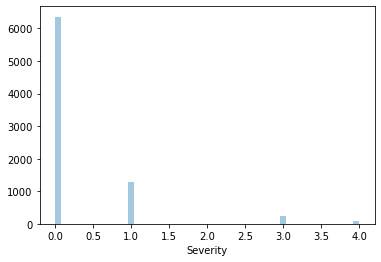

In [477]:
sns.distplot(train['Severity'],kde=False)

In [478]:
#similarly most of the severity is 0 i.e., light, we will fill in the missing values with 0. 

In [479]:
train=train.fillna({"Severity":0})
test=test.fillna({"Severity":0})

In [480]:
state_mapping={'CO':0,'OK':1,'MN':2,'LA':3}
train['State']=train['State'].map(state_mapping)
test['State']=test['State'].map(state_mapping)

In [481]:
def ID(data,size):
    id=[]
    z=data['EventId']
    for i in range(0,size):
        var=re.split("[-]",z[i])
        id.append(int(var[1]))
    return id
trainid=ID(train,10000)
testid=ID(test,500)

In [482]:
train['id']=trainid
test['id']=testid

In [483]:
train=train.drop(['EventId'],axis=1)
test=test.drop(['EventId'],axis=1)

In [484]:
train=shuffle(train)
test=shuffle(test)

In [485]:
train=train.apply(pd.to_numeric)
test=test.apply(pd.to_numeric)

In [486]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['id','tt'], axis=1)
target = train["tt"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [487]:
y_train.dtypes

dtype('float64')

In [488]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [489]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)

In [490]:
print(y_pred)

[1.38955863 0.61172285 1.26594358 ... 1.26594358 0.81566416 1.38955863]


In [491]:
print(y_val)

588     2.000000
1053    0.400000
6918    1.000000
2662    0.666667
8283    2.666667
          ...   
2682    0.333333
7259    0.666667
8795    0.333333
4828    0.250000
1234    0.600000
Name: tt, Length: 2200, dtype: float64


In [492]:
from sklearn.metrics import r2_score
print(r2_score(y_val, y_pred))

-0.15414620944560875
